In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
def one_hot_vec(arr):
    v = np.zeros((arr.size, arr.max() + 1))
    v[np.arange(arr.size), arr] = 1
    return v

In [3]:
data = datasets.load_iris()
X = data.data
data_mean = np.mean(X.ravel())
data_std = np.std(X.ravel())
X = (X - data_mean) / data_std
Y = one_hot_vec(data.target)
X, Y = shuffle(X,Y)
X_train = X[:120]
Y_train = Y[:120]
X_test = X[120:]
Y_test = Y[120:]
print(f"X_train.shape: {X_train.shape}")
print(f"Y_train.shape: {Y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"Y_test.shape: {Y_test.shape}")

X_train.shape: (120, 4)
Y_train.shape: (120, 3)
X_test.shape: (30, 4)
Y_test.shape: (30, 3)


$ \frac{\partial L}{\partial W2} = \frac{\partial L}{\partial A2} \frac{\partial A2}{\partial Z2} \frac{\partial Z2}{\partial W2} $ -> dW2

$\frac{\partial L}{\partial Z2} = \frac{\partial L}{\partial A2} \frac{\partial A2}{\partial AZ2}$ -> dZ

$ \frac{\partial L}{\partial W2} = \frac{\partial L}{\partial A2} \frac{\partial A2}{\partial Z2} \frac{\partial Z2}{\partial W2} \frac{\partial W2}{\partial W1} \frac{\partial A1}{\partial Z1} \frac{\partial Z1}{\partial W1} $ -> dW1

In [22]:
learning_rate = 0.001
input_dims = 4
H1 = 150
n_out = 3
n_epochs = 1200
W1 = np.random.rand(input_dims, H1)
W2 = np.random.rand(H1, n_out) 
b1 = np.zeros((1, H1))
b2 = np.zeros((1, n_out))

print(f"W1.shape: {W1.shape}")
print(f"W2.shape: {W2.shape}")

losses, epochs = [], list(range(n_epochs))
activation_fn = "relu"
# train
for epoch in epochs:
    X_train, Y_train = shuffle(X_train, Y_train)
    # forward pass
    Z1 = np.dot(X_train, W1) + b1
    if activation_fn == "tanh":
        A1 = np.tanh(Z1) #  tanh
    elif activation_fn == "relu":
        A1 = Z1.copy() # relu
        A1 = np.maximum(0, Z1) # relu
    else:
        raise NotImplementedError
    Z2 = np.dot(A1, W2) + b2
    Z2 = Z2 - np.max(Z2, axis=-1, keepdims=True) # applying norm due to nans, src: https://stackoverflow.com/questions/54880369/implementation-of-softmax-function-returns-nan-for-high-inputs
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=-1, keepdims=True) # softmax 
    L = -(1./X.shape[0]) * np.sum(Y_train * np.log(A2) + (np.ones_like(Y_train) - Y_train) * np.log(np.ones_like(A2) - A2)) # cost-entropy loss function (CE loss and natural log loss used interchangeably)
    if epoch % 10 == 0:
        print(f"epoch {epoch} loss: {L}")   
    losses.append(L)
    
    # backward pass
    dZ2 = A2 - Y_train 
    dW2 = (1. / X_train.shape[0]) * np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T) 
    if activation_fn == "tanh":
        dZ1 = dA1 * (1 - (np.tanh(dA1))**2) # backprop tanh
    elif activation_fn == "relu":
        dZ1 = dA1.copy() # backprop relu
        dZ1[A1 < 0 ] = 0 # backprop relu
    else:
        raise NotImplementedError
    dW1 = (1. / X_train.shape[0]) * np.dot(X_train.T, dZ1) 
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    #SGD
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * b1
    b2 -= learning_rate * b2
    

W1.shape: (4, 150)
W2.shape: (150, 3)
epoch 0 loss: 2.4090549383631203
epoch 10 loss: 2.1089150478148913
epoch 20 loss: 1.9319528590988657
epoch 30 loss: 1.8058678434551507
epoch 40 loss: 1.6999578280495895
epoch 50 loss: 1.6041137151476388
epoch 60 loss: 1.5155531614106457
epoch 70 loss: 1.4342945878337006
epoch 80 loss: 1.3614882447749723
epoch 90 loss: 1.2982523292410502
epoch 100 loss: 1.2451235848231732
epoch 110 loss: 1.2017189735669922
epoch 120 loss: 1.1667358296629218
epoch 130 loss: 1.1383487360544924
epoch 140 loss: 1.1146704427618084
epoch 150 loss: 1.0943136282386312
epoch 160 loss: 1.0762966403389662
epoch 170 loss: 1.059904168575292
epoch 180 loss: 1.0446871515495408
epoch 190 loss: 1.030398351133373
epoch 200 loss: 1.016849870363969
epoch 210 loss: 1.0039100498172924
epoch 220 loss: 0.991561041955092
epoch 230 loss: 0.9797706563192782
epoch 240 loss: 0.9684338514531774
epoch 250 loss: 0.9575498224180929
epoch 260 loss: 0.9470747292002353
epoch 270 loss: 0.93697691984261

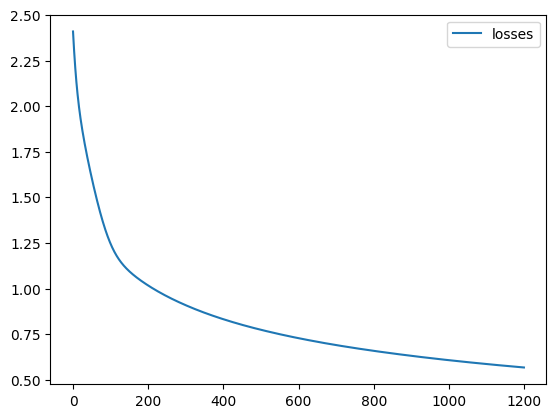

In [23]:
sns.lineplot(data=pd.DataFrame(losses, columns=["losses"]))
plt.show()
plt.close()

In [24]:
def forward(X, activation_fn):
    # forward pass
    Z1 = np.dot(X, W1) + b1
    if activation_fn == "tanh":
        A1 = np.tanh(Z1) #  tanh
    elif activation_fn == "relu":
        A1 = Z1.copy()
        A1 = np.maximum(0, A1) # relu
    else:
        raise NotImplementedError
    Z2 = np.dot(A1, W2) + b2
    Z2 = Z2 - np.max(Z2, axis=-1, keepdims=True) # applying norm due to nans, src: https://stackoverflow.com/questions/54880369/implementation-of-softmax-function-returns-nan-for-high-inputs
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=-1, keepdims=True) # softmax 
    return A2

# test
predicted = forward(X_test, "relu")
y_hat = np.argmax(predicted, axis=1)
y_hat = one_hot_vec(y_hat)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_hat, Y_test))

0.8333333333333334
